### <font color = 'green'> Team Members: 
    1. Aniruddha Sudhindra Shirahatti
    2. Chandrakanth Rajesh
    3. Krishna Vishwanatham
    4. Digvijay Gole
    5. Yash Bonde

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

#for pipelining
from sklearn.pipeline import Pipeline

#from aif360.datasets import GermanDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing

Using TensorFlow backend.


In [2]:
bank = pd.read_csv("bank-additional-full.csv",delimiter=';') 

In [3]:
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Top rows can be seen by calling dataframe.head() function, we can specify number of rows as an argument in head() function to display required no of rows.

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

<b>  Structure of dataframe can be checked by calling dataframe.info() function.<br/>
  N entries - N rows in dataframe<br/>
  N columns - N columns in dataframe <br/>
  Together they show dimension of data frame.<br/>
  Data columns, total count, default, and dtype of each column is also shown.</b>

In [5]:
bank.count()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
y                 41188
dtype: int64

#### DataFrame.count function returns the non-NA cells for each column in the dataframe.

In [6]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Dataframe.describe() function generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This function also analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [7]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### Dataframe.columns displays the column labels of the DataFrame. This helps to perform cleaning on the dataset if necessary.

In [8]:
bank.columns = bank.columns.str.replace(".", "_") 
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

#### Column names are messy with dots. So, to remove anamolies, replacing dots with underscore.

#### Data in real world are rarely clean and homogeneous. Typically, they tend to be incomplete, noisy, and inconsistent and it is an important task of a Data scientist to prepossess the data by filling missing values.

In [9]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [10]:
bank._get_numeric_data().columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

#### We have the information of the numerical columns, We can now get the data for categorical columns So that we can derive insights from the dataset.

In [11]:
cols = bank.columns
num_cols = bank._get_numeric_data().columns
list(set(cols) - set(num_cols))

['contact',
 'month',
 'loan',
 'y',
 'education',
 'default',
 'job',
 'day_of_week',
 'poutcome',
 'marital',
 'housing']

#### Now we have the data for categorical attributes. Let's check the categories for each attribute.

In [12]:
# Displaying categories for Job attribute.
bank.job = bank.job.astype('category')
bank.job.cat.categories

Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object')

In [13]:
# Removing dots in the job attribute data.
bank.job = bank.job.str.replace(".", "") 
bank.job = bank.job.astype('category')
bank.job.cat.categories

Index(['admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object')

In [14]:
# Displaying job attribute data for confirmation.
bank.job

0            housemaid
1             services
2             services
3                admin
4             services
5             services
6                admin
7          blue-collar
8           technician
9             services
10         blue-collar
11            services
12         blue-collar
13           housemaid
14         blue-collar
15             retired
16         blue-collar
17         blue-collar
18         blue-collar
19          management
20          unemployed
21         blue-collar
22             retired
23          technician
24               admin
25          technician
26          technician
27       self-employed
28          technician
29             unknown
             ...      
41158       technician
41159       technician
41160            admin
41161            admin
41162      blue-collar
41163       technician
41164            admin
41165        housemaid
41166            admin
41167            admin
41168     entrepreneur
41169         services
41170      

In [15]:
# Displaying categories for month attribute.
bank.month = bank.month.astype('category')
bank.month.cat.categories

Index(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'], dtype='object')

In [16]:
# Displaying categories for loan attribute.
bank.loan = bank.loan.astype('category')
bank.loan.cat.categories

Index(['no', 'unknown', 'yes'], dtype='object')

In [17]:
# Displaying categories for education attribute.
bank.education = bank.education.astype('category')
bank.education.cat.categories

Index(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown'],
      dtype='object')

In [18]:
# We can see the dots in the data. So replacing with space
bank.education = bank.education.str.replace(".", " ") 
bank.education = bank.education.astype('category')
bank.education.cat.categories

Index(['basic 4y', 'basic 6y', 'basic 9y', 'high school', 'illiterate',
       'professional course', 'university degree', 'unknown'],
      dtype='object')

In [19]:
# Displaying categories for poutcome attribute.
bank.poutcome = bank.poutcome.astype('category')
bank.poutcome.cat.categories

Index(['failure', 'nonexistent', 'success'], dtype='object')

In [20]:
# Displaying categories for y (target) attribute.
bank.y = bank.y.astype('category')
bank.y.cat.categories

Index(['no', 'yes'], dtype='object')

#### Data Aggregation : This step helps us to find the descriptive measures in the data set in the form of new data. We can store this data in new variables and can be used as required.

In [21]:
# By applying Data aggregation, computing the age median value for each job in the dataset. 
bank.groupby('job')['age'].median()

job
admin            36
blue-collar      39
entrepreneur     41
housemaid        45
management       42
retired          59
self-employed    39
services         36
student          25
technician       37
unemployed       39
unknown          45
Name: age, dtype: int64

In [22]:
# By applying Data aggregation, computing the last contact duration median value for each education attribute in the dataset.
bank.groupby('education')['duration'].median()

education
basic 4y               185.0
basic 6y               181.0
basic 9y               184.0
high school            182.0
illiterate             137.5
professional course    173.0
university degree      174.0
unknown                188.0
Name: duration, dtype: float64

<br/>

## Exploratory Data Analysis (EDA)

In [23]:
bank.dtypes

age                  int64
job               category
marital             object
education         category
default             object
housing             object
loan              category
contact             object
month             category
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp_var_rate       float64
cons_price_idx     float64
cons_conf_idx      float64
euribor3m          float64
nr_employed        float64
y                 category
dtype: object

<b>Variable identification: </b><br/>
By checking the dataypes and the data in each column of the dataset we can identify the variables as

1. numeric continuous - age, duration, campaign, pdays, euribor3m
2. numeric discrete - previous, emp_var_rate, cons_price_idx, cons_conf_idx, nr_employed
3. categorical nominal -job, marital, default, housing, loan, contact, month, day_of_week, y
4. categorical ordinal - education, poutcome

<b>Size of the dataset:</b><br/>
We can get the size of the dataset using the .shape method

In [24]:
bank.shape

(41188, 21)

<b>Non-Graphical Univariate Analysis:<br/>
To get the count of unique values:<br/></b>
The value_counts() method in Pandas returns a series containing the counts of all the unique values in a column. The output will be in descending order so that the first element is the most frequently-occurring element.

In [25]:
bank.job.value_counts()

admin            10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

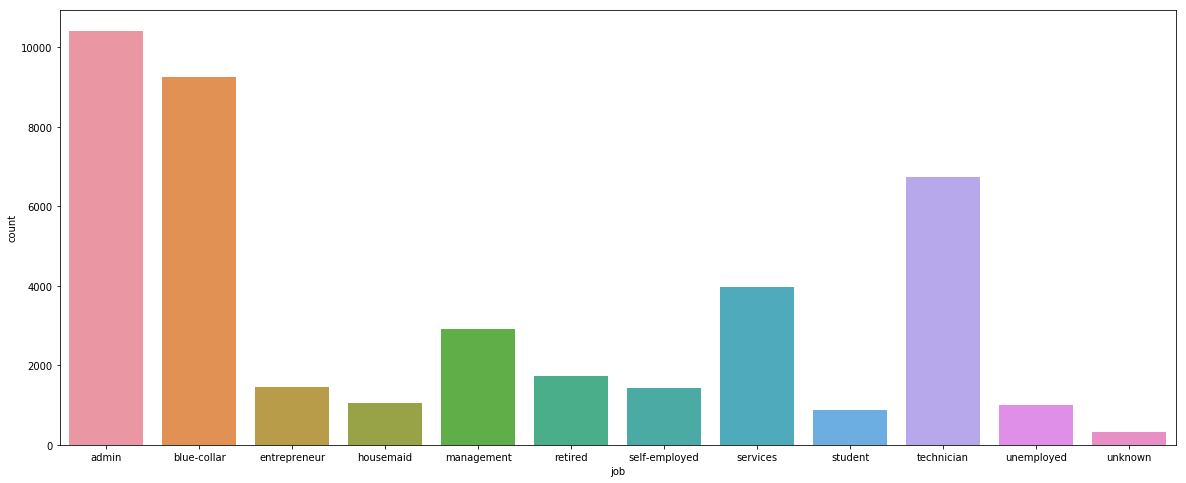

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(x="job", data=bank)

<b>Observations:</b><br/>
- We understand that majority of the banks's clients do admin job or bue-collar job.
- Some clients are unemployed and few clients job status is not shared with the bank.

In [27]:
bank.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

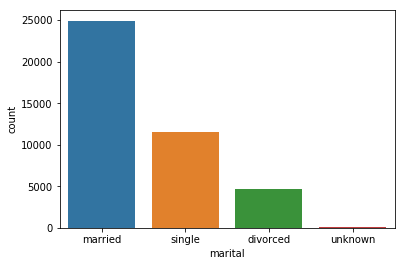

In [28]:
sns.countplot(x="marital", data=bank)

<b>Observations:</b><br/>
- We understand that majority of the banks's clients are married.
- Some clients marital status is not shared with the bank.

In [29]:
bank.education.value_counts()

university degree      12168
high school             9515
basic 9y                6045
professional course     5243
basic 4y                4176
basic 6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

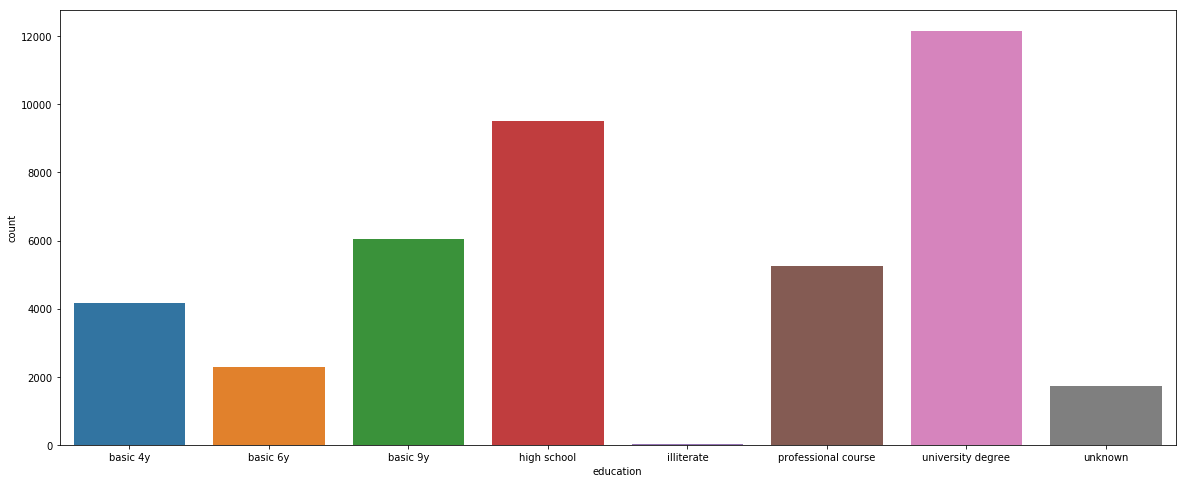

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(x="education", data=bank)

<b>Observations:</b><br/>
- We understand that majority of the banks's clients have a university degree or they have completed high school.
- Some clients education qualification is unknown and few clients are illiterate.

In [31]:
bank.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

<b>Observations:</b><br/>
- We understand that there are many clients whose default status is unknown.

In [32]:
bank.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

<b>Observations:</b><br/>
- Some clients have housing loan and some do not.

In [33]:
bank.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

<b>Observations:</b><br/>
- We understand that majority of the clients do not have personal loan.

In [34]:
bank.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [35]:
bank.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

<b>Observations:</b><br/>
- Most of the clients were contacted last time in the month of May.

In [36]:
bank.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [37]:
bank.duration.value_counts()

85      170
90      170
136     168
73      167
124     164
87      162
72      161
104     161
111     160
106     159
109     158
97      158
122     157
135     156
92      156
114     156
139     155
96      155
119     155
82      154
89      153
76      153
71      152
126     152
125     152
93      151
107     150
88      150
83      149
123     149
       ... 
2184      1
1395      1
1555      1
1556      1
1447      1
1492      1
3509      1
1460      1
1364      1
1300      1
3078      1
1095      1
1191      1
1255      1
1287      1
3366      1
1479      1
2035      1
1575      1
1767      1
1236      1
3253      1
2089      1
1204      1
1140      1
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64

<b>Observations:</b><br/>
- Majority of the call duration to the clients range between 70 to 140 seconds.

In [38]:
bank.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

<b>Observations:</b><br/>
- We can see that majority of the clients haven't been contacted by the bank yet. That is the reason most of the records have value 999.

In [39]:
bank.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

<b>Observations:</b><br/>
- Majority of the clients were not contacted by the bank during previous campaign.

In [40]:
bank.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

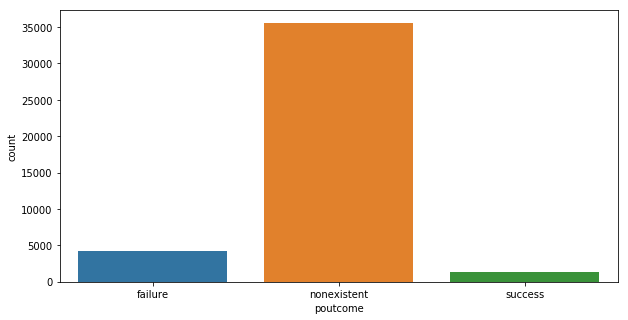

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x="poutcome", data=bank)

<b>Observations:</b><br/>
- Majority of the clients did not take part in the previous campaign.

In [42]:
bank.emp_var_rate.value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp_var_rate, dtype: int64

In [43]:
bank.nr_employed.value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr_employed, dtype: int64

In [44]:
bank.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

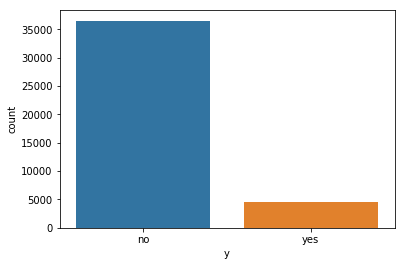

In [45]:
sns.countplot(x="y", data=bank)

<b>Observations:</b><br/>
- Majority of the clients did not subscribe the term deposit.
- This dataset is unbalanced.

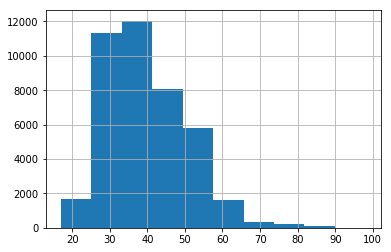

In [46]:
bank['age'].hist()

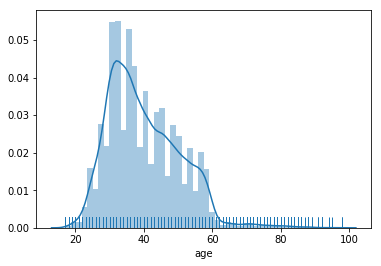

In [47]:
sns.distplot(a=bank["age"],rug=True)

<b>Observations:</b><br/>
- Majority of the clients fall in the age group 26 to 55

<b>Printing out standard deviation and variance</b>

In [48]:
print("Std: ", bank.age.std())
print("variance: ", bank.age.var())

Std:  10.421249980934235
variance:  108.60245116512178


In [49]:
bank.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


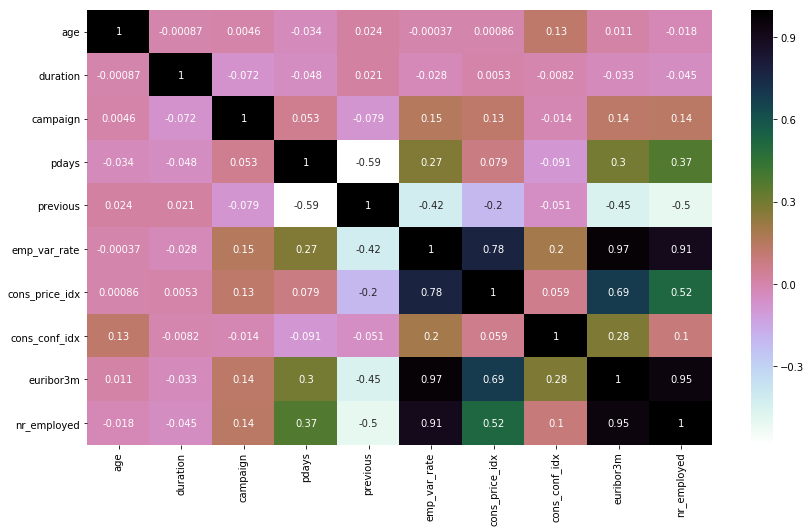

In [50]:
#Heatmap for the bank dataset
plt.figure(figsize=(14,8))
sns.heatmap(bank.corr(),annot=True,cmap='cubehelix_r')
plt.show()

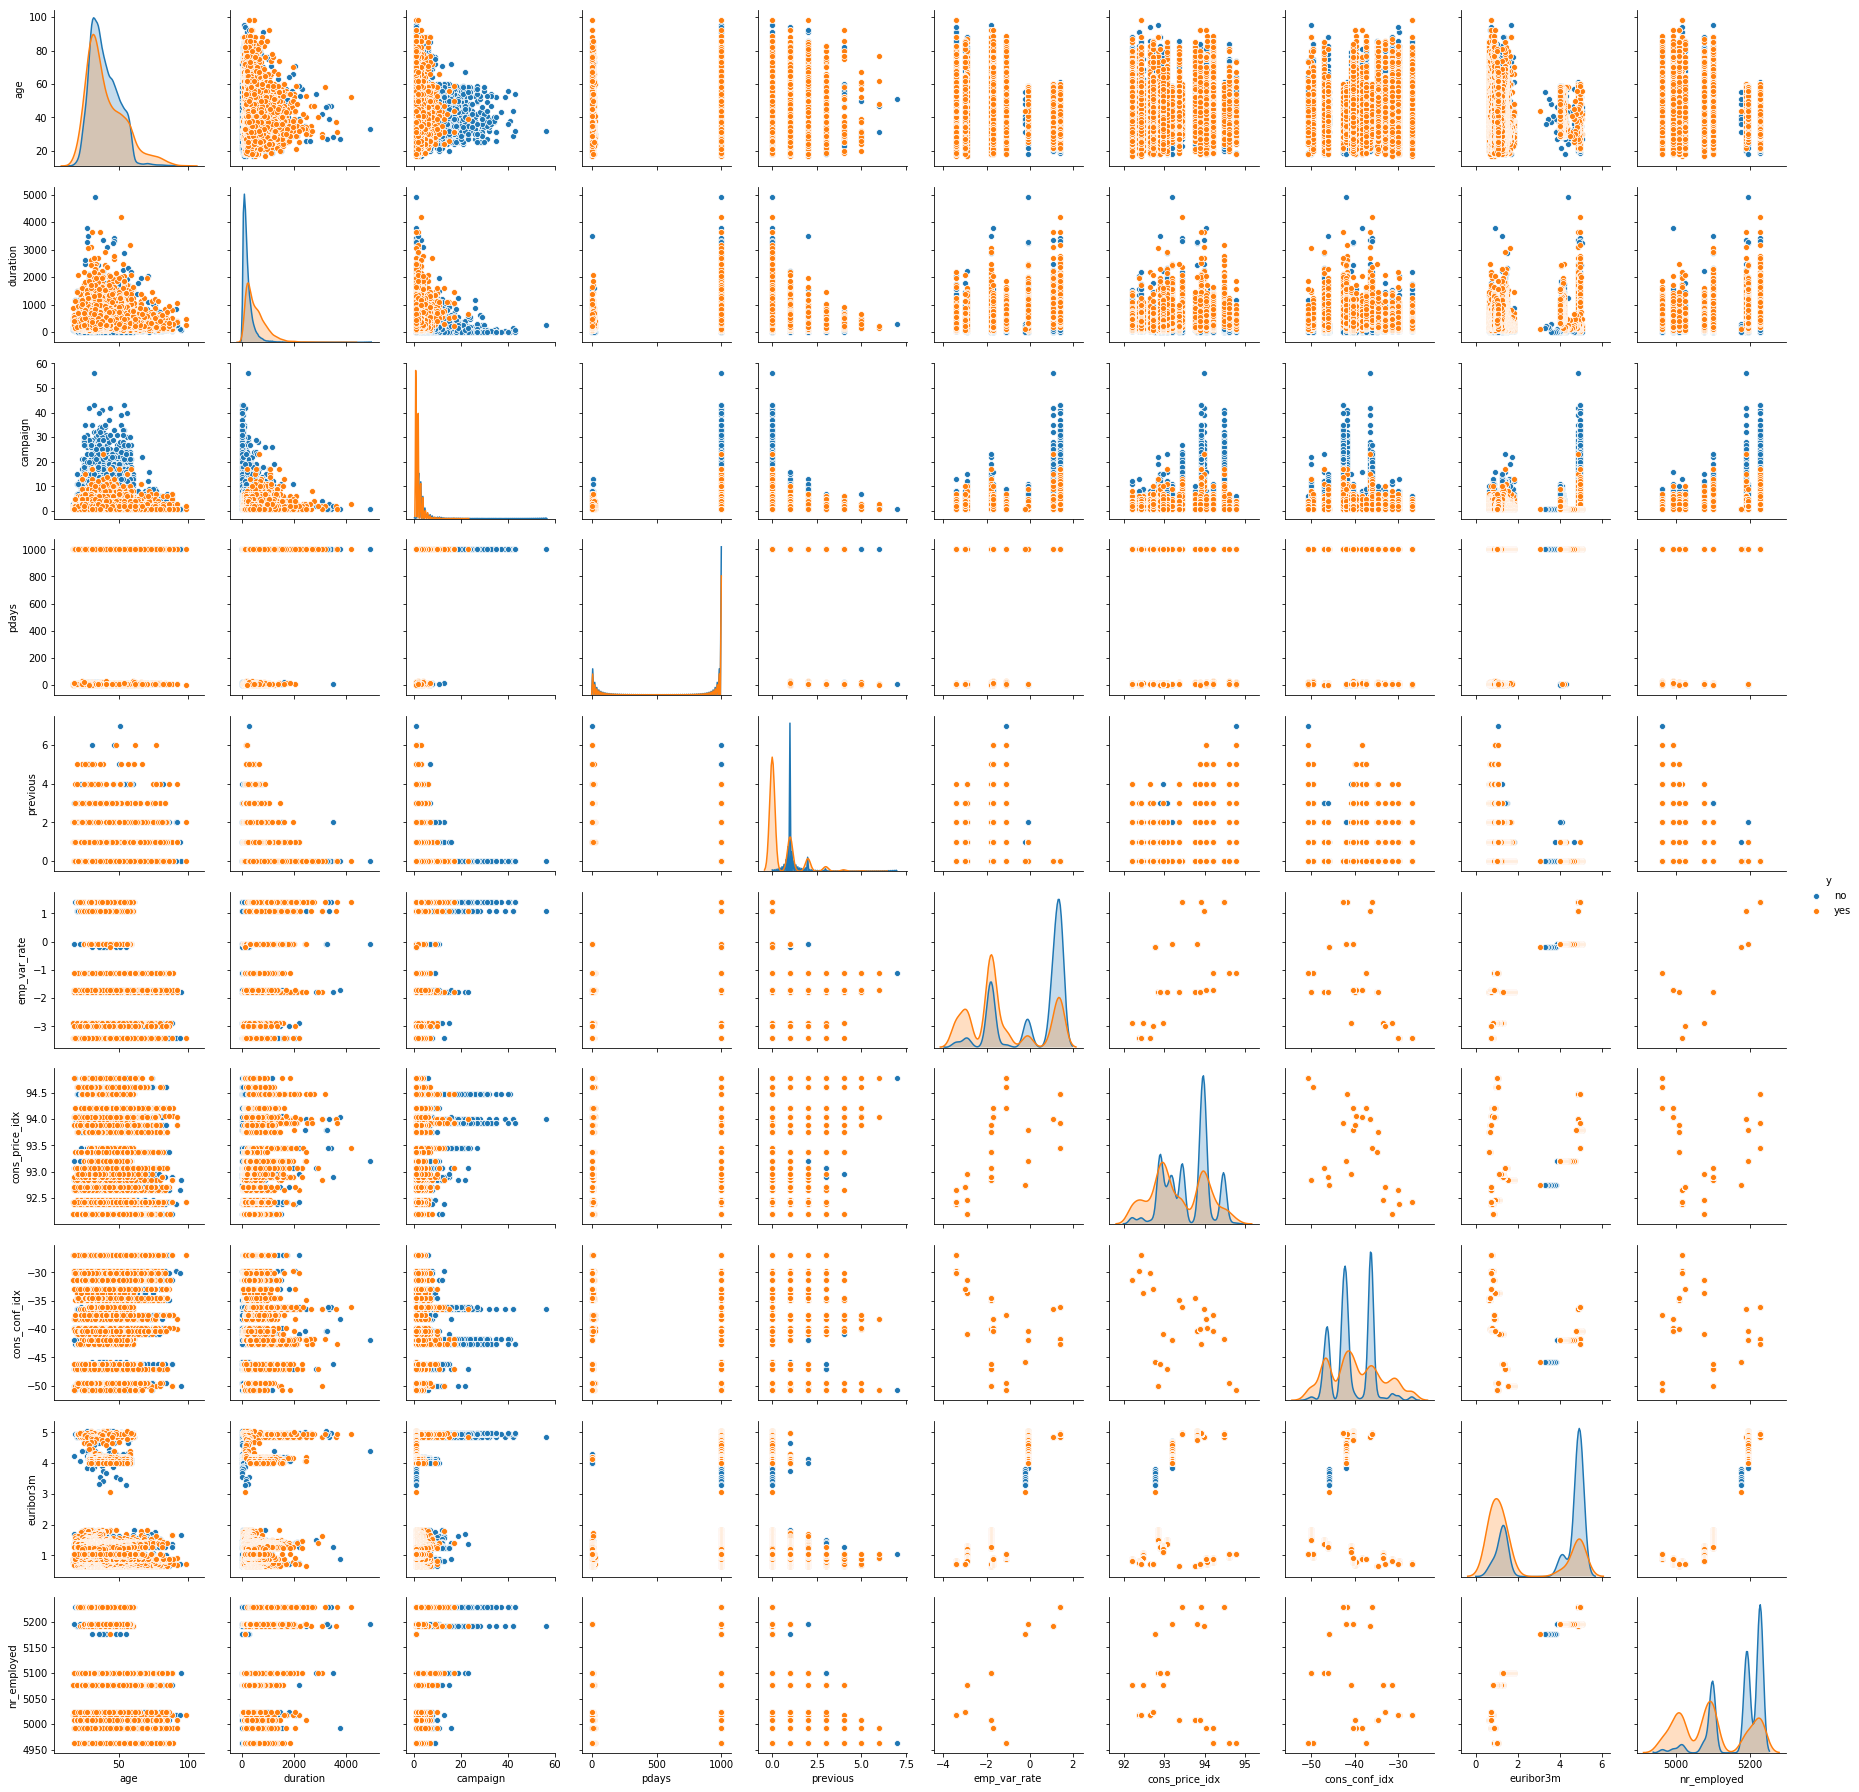

In [51]:
sns.pairplot(bank, hue="y")

  <b>Observations:</b>
  - employee variation rate has high correlation with euribor3m, nr_employed, and consumer price index.
  - euribor3m has high correlation with nr_employed.

In [52]:
bank[(bank['default'] == "no") & (bank['loan'] == "no")].count()

age               26849
job               26849
marital           26849
education         26849
default           26849
housing           26849
loan              26849
contact           26849
month             26849
day_of_week       26849
duration          26849
campaign          26849
pdays             26849
previous          26849
poutcome          26849
emp_var_rate      26849
cons_price_idx    26849
cons_conf_idx     26849
euribor3m         26849
nr_employed       26849
y                 26849
dtype: int64

<b>Most of the clients who do not have personal loan don't default.</b>

In [53]:
bank[(bank['default'] == "no") & (bank['housing'] == "yes")].count()

age               17211
job               17211
marital           17211
education         17211
default           17211
housing           17211
loan              17211
contact           17211
month             17211
day_of_week       17211
duration          17211
campaign          17211
pdays             17211
previous          17211
poutcome          17211
emp_var_rate      17211
cons_price_idx    17211
cons_conf_idx     17211
euribor3m         17211
nr_employed       17211
y                 17211
dtype: int64

<b>Most of the clients who have housing loan don't default.</b>

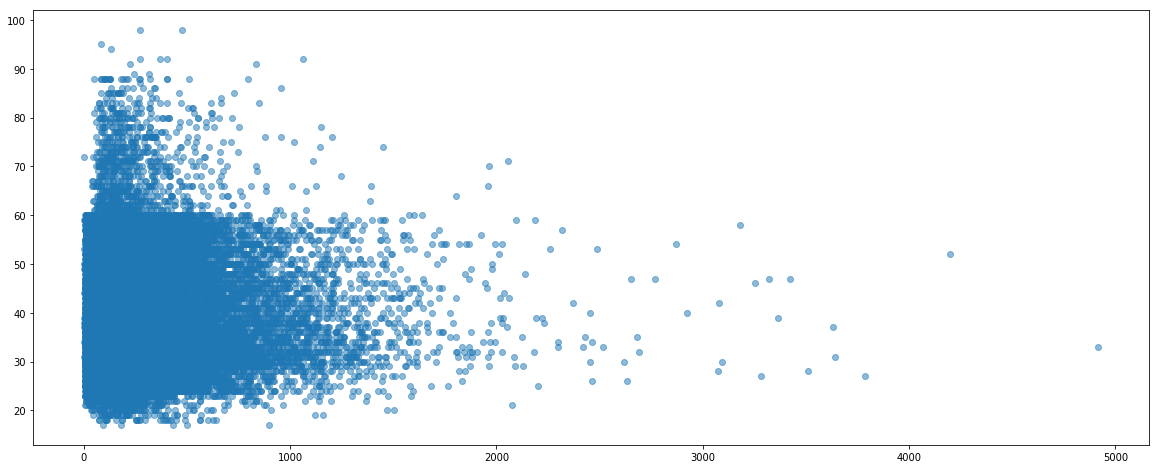

In [54]:
plt.figure(figsize=(20,8))
plt.scatter(bank.duration, bank.age, alpha=0.5)
plt.show()

<b>Bank contacted majority of the clients between age group 25 to 60 for longer duration.</b>

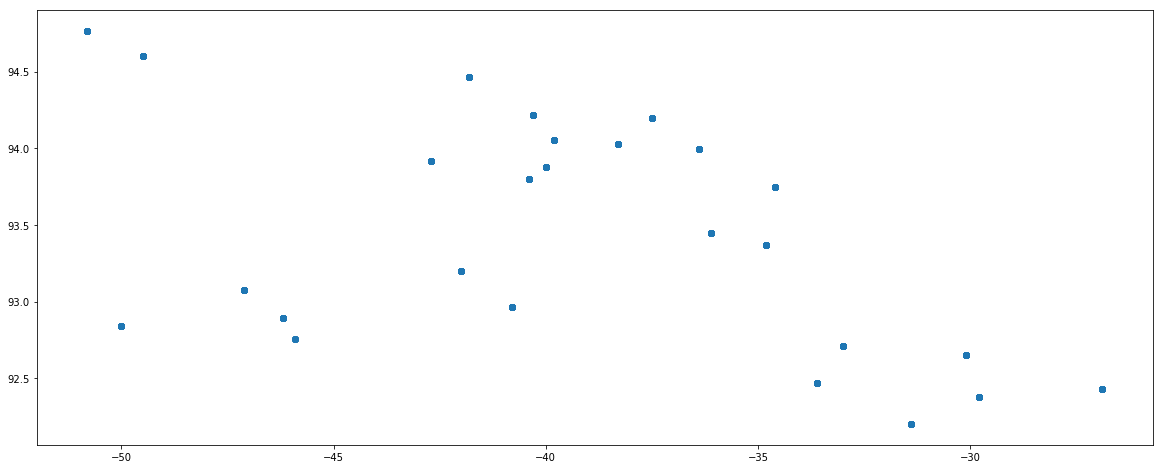

In [55]:
plt.figure(figsize=(20,8))
plt.scatter(bank.cons_conf_idx, bank.cons_price_idx, alpha=0.5)
plt.show()

<b>Consumer price index is high when consumer confidence index is between -43 to -38</b>

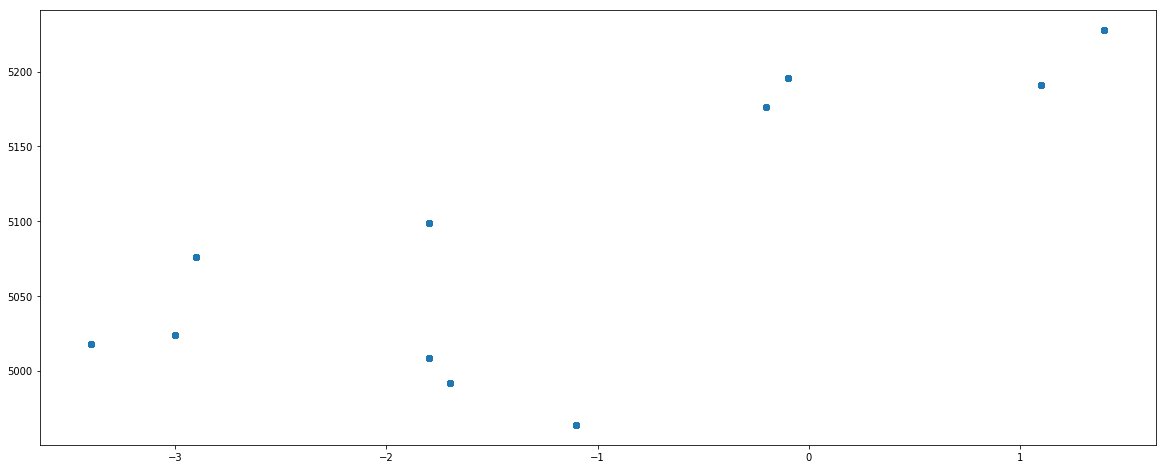

In [56]:
plt.figure(figsize=(20,8))
plt.scatter(bank.emp_var_rate, bank.nr_employed, alpha=0.5)
plt.show()

<b>Large number of employees are employed when the employee variation rate is between 0 and 1.</b>

In [57]:
temp = bank[(bank['pdays'] == 999) & (bank['previous'] != 0)]
temp[['pdays', 'previous']]

,pdays,previous
24013,999,1
24019,999,1
24076,999,1
24102,999,1
24113,999,1
24124,999,1
24135,999,1
24139,999,1
24140,999,1
24143,999,1


<br/>

## Data Preprocessing

In [58]:
X = bank.drop('y', axis=1)
y = bank.y

<b>To simplify the next steps in the data preprocessing process, The target variable 'y' which needs to be predicted is dropped.</b>

In [59]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

<b>generated new samples X_resampled and y_resampled in the classes which are under-represented.</b>

In [60]:
X_sampled = pd.DataFrame(X_resampled, columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed'])

y_sampled = pd.DataFrame(y_resampled, columns=['y'])
X_sampled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
1,57,services,married,high school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
2,37,services,married,high school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
3,40,admin,married,basic 6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
4,56,services,married,high school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
5,45,services,married,basic 9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
6,59,admin,married,professional course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
8,24,technician,single,professional course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
9,25,services,single,high school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191


<b>Results for X_sampled for the selected columns after Oversampling process.</b>

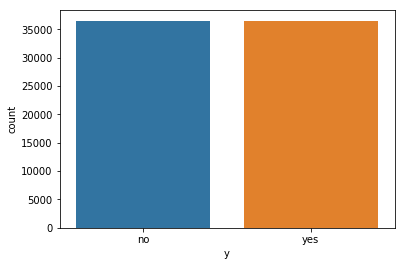

In [61]:
sns.countplot(x="y", data=y_sampled)

<b>Histogram representing the countplot for y_sampled data after Over Sampling.

Observations:</b><br/>
- Previously we found that majority of the clients did not subscribe the term deposit in the unbalanced dataset.
- After OverSampling, data count for whether clients subscribe for the term deposit are equal.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000FD24D9E400>,
      dtype=object)

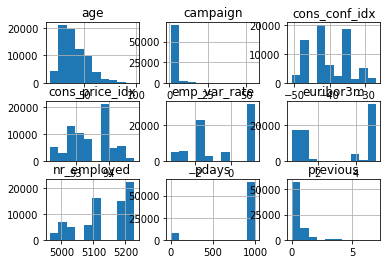

In [62]:
temp = X_sampled[['age','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']]
xt = temp.astype(np.float)

xt.hist()

In [63]:
X_sampled = X_sampled.drop('duration', axis=1)
X_sampled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
1,57,services,married,high school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
2,37,services,married,high school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
3,40,admin,married,basic 6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
4,56,services,married,high school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
5,45,services,married,basic 9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
6,59,admin,married,professional course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
8,24,technician,single,professional course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
9,25,services,single,high school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191


In [64]:
uniqueVal = bank[(bank['pdays'] != 999)].pdays.unique()
uniqueVal

array([ 6,  4,  3,  5,  1,  0, 10,  7,  8,  9, 11,  2, 12, 13, 14, 15, 16,
       21, 17, 18, 22, 25, 26, 19, 27, 20], dtype=int64)

<b>Unique values for the field pdays : number of days that passed by after the client was last contacted.</b>

In [65]:
bank.pdays.loc[(bank['pdays'] == 999) & (bank['previous'] != 0)] = 9

G:\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [66]:
temp = X_sampled[['age','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']]
xt = temp.astype(np.float)

scaler = MinMaxScaler()
X_sampled[['age','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']] = scaler.fit_transform(X_sampled[['age','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']].astype(np.float))

#temp1 = pd.DataFrame(st, columns=['age','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed'])
#temp1
X_sampled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,0.481481,housemaid,married,basic 4y,no,no,no,telephone,may,mon,0,1,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.493827,services,married,high school,unknown,no,no,telephone,may,mon,0,1,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.246914,services,married,high school,no,yes,no,telephone,may,mon,0,1,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.283951,admin,married,basic 6y,no,no,no,telephone,may,mon,0,1,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.481481,services,married,high school,no,no,yes,telephone,may,mon,0,1,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735
5,0.345679,services,married,basic 9y,unknown,no,no,telephone,may,mon,0,1,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735
6,0.518519,admin,married,professional course,no,no,no,telephone,may,mon,0,1,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735
7,0.296296,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,0,1,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735
8,0.0864198,technician,single,professional course,no,yes,no,telephone,may,mon,0,1,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735
9,0.0987654,services,single,high school,no,yes,no,telephone,may,mon,0,1,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735


<b>Scaled each feature in the min-max range using MinMaxScaler.fit_transform() method.</b>

In [67]:
data = pd.concat([X_sampled, y_sampled], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73096 entries, 0 to 73095
Data columns (total 20 columns):
age               73096 non-null object
job               73096 non-null object
marital           73096 non-null object
education         73096 non-null object
default           73096 non-null object
housing           73096 non-null object
loan              73096 non-null object
contact           73096 non-null object
month             73096 non-null object
day_of_week       73096 non-null object
campaign          73096 non-null object
pdays             73096 non-null object
previous          73096 non-null object
poutcome          73096 non-null object
emp_var_rate      73096 non-null object
cons_price_idx    73096 non-null object
cons_conf_idx     73096 non-null object
euribor3m         73096 non-null object
nr_employed       73096 non-null object
y                 73096 non-null object
dtypes: object(20)
memory usage: 11.2+ MB


<b>Info of the X_sampled and y_sampled data.</b>

In [68]:
nominal = ['job','marital','education','contact','month','day_of_week', 'poutcome', 'default', 'housing', 'loan']
dataProcessed = pd.get_dummies(data,columns=nominal)
dataProcessed['y']=dataProcessed['y'].map({'yes': 1,'no': 0})
dataProcessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73096 entries, 0 to 73095
Data columns (total 63 columns):
age                              73096 non-null object
campaign                         73096 non-null object
pdays                            73096 non-null object
previous                         73096 non-null object
emp_var_rate                     73096 non-null object
cons_price_idx                   73096 non-null object
cons_conf_idx                    73096 non-null object
euribor3m                        73096 non-null object
nr_employed                      73096 non-null object
y                                73096 non-null int64
job_admin                        73096 non-null uint8
job_blue-collar                  73096 non-null uint8
job_entrepreneur                 73096 non-null uint8
job_housemaid                    73096 non-null uint8
job_management                   73096 non-null uint8
job_retired                      73096 non-null uint8
job_self-employed 

<b>Results after converting categorical variables into dummy or indicator variables.</b>

<br/>

## Data Modelling

In [69]:
X = dataProcessed.drop('y', axis=1).values
y = dataProcessed['y'].values

<b>Dropping target variable 'y' from the dataProcessed dataset and storing it in y variable.</b>

In [70]:
X.shape,y.shape

((73096, 62), (73096,))

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

<b>Splitting the dataset into training and test with 20% of the data as test data and 80% of the data as training data.</b>

In [72]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(x_train,y_train)
#
y_pred=logreg.predict(x_test)

G:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<b>Applying Logistic regression to find the accuracy,precision measures.</b>

In [73]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[6233, 1099],
       [2693, 4595]], dtype=int64)

<b>Implementing confusion matrix to evaluate the output of the classifier.</b>

Text(0.5, 257.44, 'Predicted label')

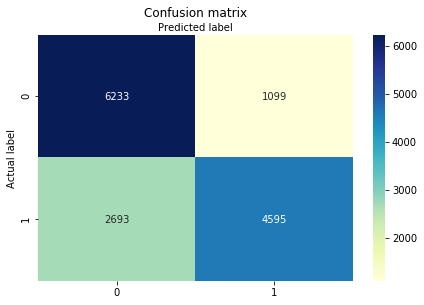

In [74]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<b>Observations:</b>
- The classifier doesn't have ability to predict correct results.

In [75]:
print("Accuracy:", accuracy_score(y_pred, y_test))
print("Precision:", precision_score(y_pred, y_test))
print("Recall:", recall_score(y_pred, y_test))
print("F1 Score:", f1_score(y_pred, y_test))

Accuracy: 0.7406292749658002
Precision: 0.6304884742041712
Recall: 0.8069898138391289
F1 Score: 0.7079032506547527


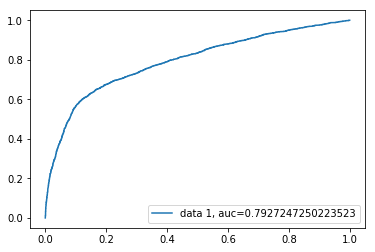

In [76]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<b>Calculating the value of the predicted probability using logreg.predict_prob.</b>

In [77]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<b>A random forest classifier is used to improve the predictive accuracy and control over-fitting.</b>

In [78]:
predict = rfc.predict(x_test)
cnf_matrix_rfc = confusion_matrix(y_test, predict)
cnf_matrix_rfc

array([[6780,  552],
       [  14, 7274]], dtype=int64)

<b>Storing the prediction value of the random forest classifier in the predict variable to derive the measures.</b>

In [79]:
acc = accuracy_score(predict, y_test)
pre = precision_score(predict, y_test)
rec = recall_score(predict, y_test)
f1 = f1_score(predict, y_test)

table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [acc, pre, rec, f1]
    })
table

,Metric,Score
0,Accuracy,0.961286
1,Precision,0.998079
2,Recall,0.929466
3,F1 Score,0.962551


<b>Observations:</b>
- Using RandomForestClassifier, all the measures are resulted above 90%

In [80]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

cnf_matrix_svm = confusion_matrix(y_test, y_pred)
cnf_matrix_svm

array([[6332, 1000],
       [2923, 4365]], dtype=int64)

In [81]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7316689466484269


### Principal component analysis (PCA)

In [82]:
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(X)
X.shape, x_pca.shape

((73096, 62), (73096, 32))

<b>Observation: <br/></b>
We need 32 features out of 62 features to capture 95% of the variance of one hot encoded data.

<br/>

## Ensemble Methods in Machine Learning Implementation

### Bagging
1. <b> BaggingClassifier </b>
2. <b> RandomForestClassifier </b>

In [83]:
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [84]:
cart = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results_bc = model_selection.cross_val_score(bc, X, y, cv=kfold)

y_pred_bc = model_selection.cross_val_predict(bc, X, y, cv=kfold)
conf_mat_bc = confusion_matrix(y, y_pred_bc)
print(conf_mat_bc)

[[ 4672 31876]
 [   17 36531]]


In [85]:
print(results_bc.mean())

0.5637072185239456


In [86]:
max_features = 3
rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results_rf = model_selection.cross_val_score(rf, X, y, cv=kfold)

y_pred_rf = model_selection.cross_val_predict(rf, X, y, cv=kfold)
conf_mat_rf = confusion_matrix(y, y_pred_rf)
print(conf_mat_rf)

[[ 9799 26749]
 [    9 36539]]


In [87]:
print(results_rf.mean())

0.633488347761572


### Boosting
1. <b> AdaBoostClassifier </b>
2. <b> GradientBoostingClassifier </b>

In [88]:
numtrees = 30
abc = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results_abc = model_selection.cross_val_score(abc, X, y, cv=kfold)

y_pred_abc = model_selection.cross_val_predict(abc, X, y, cv=kfold)
conf_mat_abc = confusion_matrix(y, y_pred_abc)
print(conf_mat_abc)

[[ 6257 30291]
 [12533 24015]]


In [89]:
print(results_abc.mean())

0.41415131991572335


In [90]:
gbc = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results_gbc = model_selection.cross_val_score(gbc, X, y, cv=kfold)

y_pred_gbc = model_selection.cross_val_predict(gbc, X, y, cv=kfold)
conf_mat_gbc = confusion_matrix(y, y_pred_gbc)
print(conf_mat_gbc)

[[ 5073 31475]
 [12398 24150]]


In [91]:
print(results_gbc.mean())

0.39980121391482004


<br/>

## Pipelining implementation in Python

- Pipelining can be implemented to automate the transformation and estimation tasks in Machine Learning process.
- In this project, we are using multiple machine learning models and it is necessary to determine which Machine Learning model gives best predictions on the given dataset.
- Therefore, we have pipelined the task of scaling and modelling to determine which model performs well.

In [92]:
# create pipeline
# it takes a list of tuples as parameter

#Logistic model with minmax scaler
mm = Pipeline([
    ('minmax', MinMaxScaler()),
    ('lr', LogisticRegression())
])

#Logistic model with standard scaler
ss = Pipeline([
    ('stdScaler', StandardScaler()),
    ('logReg', LogisticRegression())
])

<b>We can use the <i>pipeline</i> object as we would a regular classifier</b>

In [93]:
mm.fit(x_train, y_train)

G:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [94]:
ss.fit(x_train, y_train)

G:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('stdScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logReg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [95]:
mm_score = mm.score(x_test, y_test)
ss_score = ss.score(x_test, y_test)

In [96]:
print("Logistic Regression with MinMax Scaler Pipeline test accuracy: ", mm_score)
print("Logistic Regression with Standard Scaler Pipeline test accuracy: ", ss_score)

Logistic Regression with MinMax Scaler Pipeline test accuracy:  0.740766073871409
Logistic Regression with Standard Scaler Pipeline test accuracy:  0.7406976744186047


- <b> As we can observe from the test accuracy score of both the pipelines, the (MinMaxScaler + LogisticRegression) combination performs better. </b>
- <b> We further check the performance of this combination using K-Fold Cross-validation. </b>

In [97]:
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(mm, X, y, cv=kfold)
print(results)

G:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda\lib\site-packages\sklea

[0.03146375 0.36963064 0.45800274 0.34322845 0.1246238  0.5123119
 0.61157477 0.621152   0.61225886 0.59871391]


- <b>This is how the pipelining can we used according to the requirements of the project.</b>
- <b>Using pipelining, we can automate few common tasks in the project.</b>
- <b>We have implemented two-step pipeline:
    - Step 1: Uses Transformer
    - Step 2: Uses Estimator

<br/>

## Conclusion on Data Modelling:
<b>Post implementation of the following Classification Models:</b>
- Logistic Regression
- Random Forest Classifier
- SVM
- Decision Tree Classifier
<br/><br/>
* <b>'Random Forest Classifier' outperforms the other models in all the cases and makes accurate predictions.</b>
* <b>Therefore, we take the decision to use 'Random Forest Classifier' as the model to apply to our project for predicting whether the client will subscribe for term deposit or not.</b>

<br/>

## Exploring protected features for Bias

A machine learning model makes predictions of an outcome for a particular instance. The model makes these predictions based on a training dataset, where many other instances and actual outcomes are provided. Thus, a machine learning algorithm will attempt to find patterns, or generalizations, in the training dataset to use when a prediction for a new instance is needed. In many domains this technique, called supervised machine learning, has worked very well.

However, sometimes the patterns that are found may not be desirable or may even be illegal. These are due to some features which are termed as protected variables (which have high chances of introducing bias in predictions). We have one such feature in our dataset i.e. "AGE". This raises two problems: 1) the training dataset may not be representative of the true population of people of all age groups, and 2) even if it is representative, it is illegal to base any decision on a applicant's age, regardless of whether this is a good prediction based on historical data.

To check the fairness metrics, we have used AI Fairness 360 which is designed to help address this problem. Fairness metrics can be used to check for bias in machine learning workflows.

In [98]:
bias = bank

For protected attribute 'age', we assign '1.0' (older than 25) and '0.0' (younger than or equal to 25) values and categorize them as privileged and unprivileged groups, respectively.

In [99]:
bias.loc[(bias.age <= 25),'age'] = 0.0

In [100]:
bias.loc[(bias.age > 25),'age'] = 1.0

In [101]:
bias.age.value_counts()

1.0    39522
0.0     1666
Name: age, dtype: int64

In [102]:
X = bias.drop('y', axis=1)
y = bias.y

In [103]:
#dataset_orig_train, dataset_orig_test = bias.split([0.7], shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70,test_size=0.30, shuffle=True)

In [104]:
#filt_data = X_train.filter(['age'], axis=1)
num = bias[(bias.age == 0.0) & (bias.y == 'yes')].age.count()
total_unprev = bias[bias.age == 0.0].age.count()
deno = bias[(bias.age == 1.0) & (bias.y == 'yes')].age.count()
total_prev = bias[bias.age == 1.0].age.count()

<br/>

<b> The bias in the protected attribute 'age' can be checked by implementing the formula given below: </b>

                     (num_positives(privileged=False) / num_instances(privileged=False))
<b>Disparate impact = </b>                        <b>  ----------------------------------------------------------------------------------------------------------------------------------------------------- </b>

                     (num_positives(privileged=True) / num_instances(privileged=True))

<b><i>Reference: Fairness metrics overview (IBM Knowledge Center)</i></b> <br/>
https://www.ibm.com/support/knowledgecenter/SSQNUZ_2.5.0/wos/wos-fairness-ovr.html

<br/>

<b> If the value of 'Disparate impact' is 0, we can conclude that the protected attribute 'age' is unbiased. </b>

In [105]:
impact = (num/total_unprev)/(deno/total_prev)
print(impact)

1.9294380068503747


<b>Observation:</b><br/>
- It proves that our dataset has bias in 'age'.
- The privileged group have approx 200% more positive outcomes in training dataset.

<b>Since, Bias Detection and Mitigation is still area of research, we have to come up with the strategies that will help us train model with the data that is fair and make unbiased predictions.</b>

<br/>

## Future Goals

- We plan to extend this project by continuing <b>research on Bias detection and Mitigation.</b>
- We are willing to <b>incorporate pipelining on a large scale</b> and automate most of the standard processes in data mining.
- We are curious to obtain more data from multiple sources and <b>implement Data pipelining with the help of workflow management tools like Luigi and Airflow.</b>

<br/>

<br/>

<br/>

<br/>

<br/>